In [ ]:
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/xgj/spdk/exp-0219/plot")
from utils import *
import pandas as pd
import shutil
import os
import itertools

In [2]:
res_dir = "ftl_result_0811"
result_target = f"/data/home/guntherxing/{res_dir}/"
# algos = ["single_group", "sepbit", "sepgc", "mida"]
# dist = ["zipf:0.8"]
# cc = ["greedy", "cb"]
result_files = []

for subdir in os.listdir(result_target):
    sub_result_target = os.path.join(result_target, subdir)
    result_files.extend([os.path.join(sub_result_target, f) for f in os.listdir(sub_result_target)])

print(len(result_files))
print("\n".join(result_files))

IO_ITEMS = ["USER", "COMPACTION", "BASE_MD", "NVC_MD", "L2P"]

6
/data/home/guntherxing/ftl_result_0808/trace_mida_cb/op.log
/data/home/guntherxing/ftl_result_0808/trace_single_group_cb/op.log
/data/home/guntherxing/ftl_result_0808/trace_single_group_greedy/op.log
/data/home/guntherxing/ftl_result_0808/trace_sepbit_cb/op.log
/data/home/guntherxing/ftl_result_0808/trace_sepbit_greedy/op.log
/data/home/guntherxing/ftl_result_0808/trace_mida_greedy/op.log


In [19]:
def plot_io(result_file, metric, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    read_metric_dict = {}
    write_metric_dict = {}
    for item in IO_ITEMS:
        stat = extract_stat_io(result_file, item)
        read_metric_dict[item] = stat[f"read_{metric}"]
        write_metric_dict[item] = stat[f"write_{metric}"]

    read_metric_df = pd.DataFrame(read_metric_dict)
    write_metric_df = pd.DataFrame(write_metric_dict)

    read_metric_df = read_metric_df.rolling(window=10).mean().dropna().iloc[::10].reset_index(drop=True)
    write_metric_df = write_metric_df.rolling(window=10).mean().dropna().iloc[::10].reset_index(drop=True)
    print(read_metric_df)
    
    read_metric_df.to_csv(os.path.join(save_dir, f"read_{metric}.csv"))
    read_metric_df = read_metric_df[int(0.1*read_metric_df.shape[0]):int(0.9*read_metric_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    if metric == "bw":
        plt.ylabel("Bandwidth (MB/s)")
    else:
        plt.ylabel("IOPS")
    read_metric_df.plot()
    plt.savefig(os.path.join(save_dir, f"read_{metric}.pdf"))
    write_metric_df.to_csv(os.path.join(save_dir, f"write_{metric}.csv"))
    write_metric_df = write_metric_df[int(0.1*write_metric_df.shape[0]):int(0.9*write_metric_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    if metric == "bw":
        plt.ylabel("Bandwidth (MB/s)")
    else:
        plt.ylabel("IOPS")
    write_metric_df.plot()
    plt.savefig(os.path.join(save_dir, f"write_{metric}.pdf"))
    

In [20]:
def plot_stat_waf(result_file, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    stat = extract_stat_waf(result_file)
    stat_df = pd.DataFrame(stat)
    stat_df.to_csv(os.path.join(save_dir, "stat_waf.csv"))
    stat_df = stat_df[int(0.1*stat_df.shape[0]):int(0.9*stat_df.shape[0])]
    plt.clf()
    stat_df.plot()
    plt.xlabel("Time (s)")
    plt.ylabel("WAF")
    plt.savefig(os.path.join(save_dir, "stat_waf.pdf"))

In [21]:
def plot_overall_waf(result_file, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    waf, final_waf = extract_overall_waf(result_file)
    stat_df = pd.DataFrame(waf)
    stat_df.to_csv(os.path.join(save_dir, "overall_waf.csv"))
    stat_df = stat_df[int(0.1*stat_df.shape[0]):int(0.9*stat_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    plt.ylabel("WAF")
    stat_df.plot()
    plt.savefig(os.path.join(save_dir, "overall_waf.pdf"))
    return waf, final_waf

     USER  COMPACTION  BASE_MD  NVC_MD     L2P
0     0.0         0.0      0.0     0.0  1794.9
1     0.0         0.0      0.0     0.0  1045.3
2     0.0         0.0      0.0     0.0   804.0
3     0.0         0.0      0.0     0.0   725.1
4     0.0         0.0      0.0     0.0   600.7
..    ...         ...      ...     ...     ...
740   0.0      4967.3      0.0     0.0    20.8
741   0.0      3548.0      0.0     0.0     9.9
742   0.0      4446.6      0.0     0.0    19.6
743   0.0      4463.4      0.0     0.0     5.9
744   0.0      4407.3      0.0     0.0     9.3

[745 rows x 5 columns]
     USER   COMPACTION  BASE_MD  NVC_MD       L2P
0     0.0     0.000000      0.0     0.0  7.011328
1     0.0     0.000000      0.0     0.0  4.083203
2     0.0     0.000000      0.0     0.0  3.140625
3     0.0     0.000000      0.0     0.0  2.832422
4     0.0     0.000000      0.0     0.0  2.346484
..    ...          ...      ...     ...       ...
740   0.0  1581.495703      0.0     0.0  0.081250
741   0.0  1

/data/home/guntherxing/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


     USER   COMPACTION  BASE_MD  NVC_MD       L2P
0     0.0     0.000000      0.0     0.0  6.765625
1     0.0     0.000000      0.0     0.0  4.181641
2     0.0     0.000000      0.0     0.0  3.198828
3     0.0     0.000000      0.0     0.0  2.868750
4     0.0     0.000000      0.0     0.0  2.354687
..    ...          ...      ...     ...       ...
647   0.0  1691.500391      0.0     0.0  0.139453
648   0.0  1809.799609      0.0     0.0  0.190625
649   0.0  1395.600000      0.0     0.0  0.123047
650   0.0  1315.000000      0.0     0.0  0.076563
651   0.0  1671.400000      0.0     0.0  0.155859

[652 rows x 5 columns]
     USER  COMPACTION  BASE_MD  NVC_MD     L2P
0     0.0         0.0      0.0     0.0  1746.6
1     0.0         0.0      0.0     0.0  1060.1
2     0.0         0.0      0.0     0.0   812.1
3     0.0         0.0      0.0     0.0   729.4
4     0.0         0.0      0.0     0.0   599.9
..    ...         ...      ...     ...     ...
775   0.0      4500.2      0.0     0.0    54.9


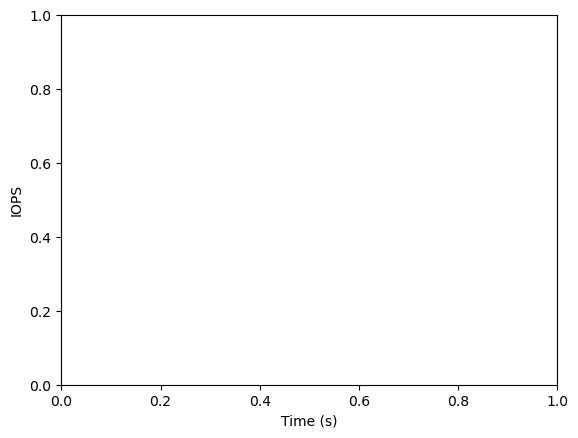

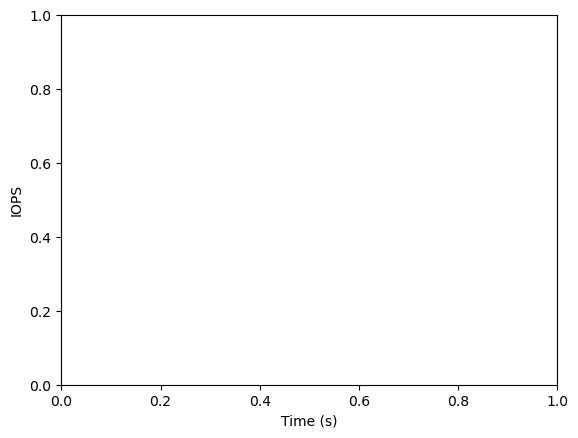

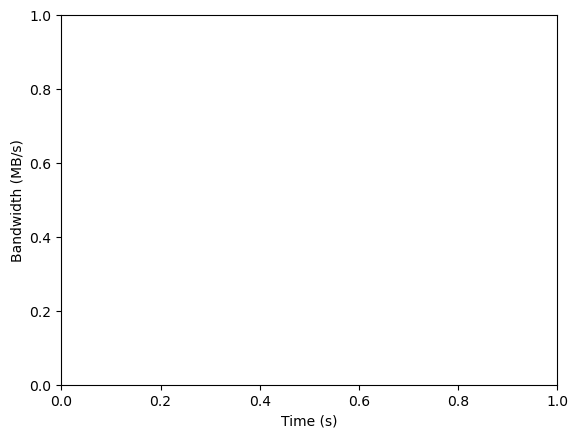

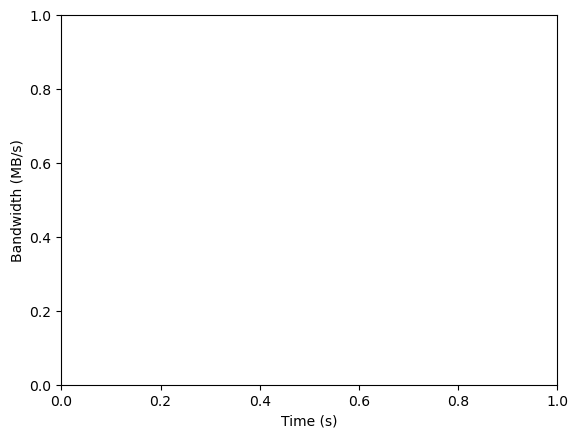

<Figure size 640x480 with 0 Axes>

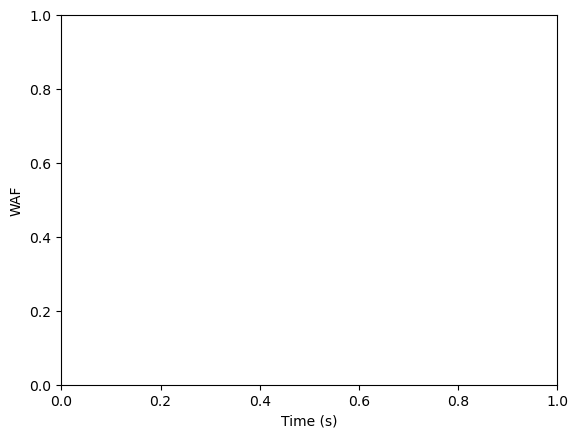

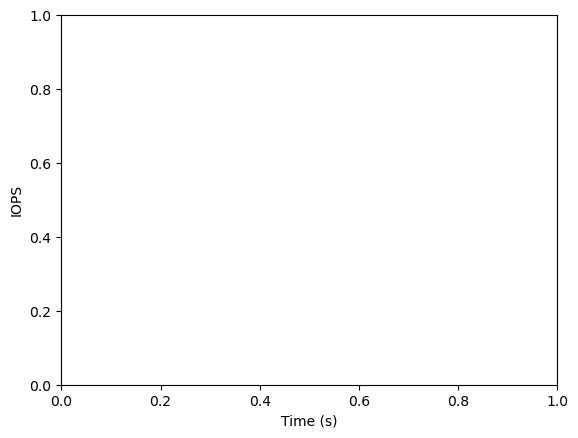

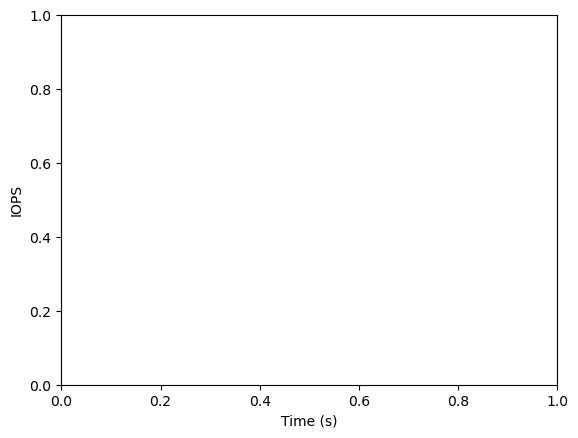

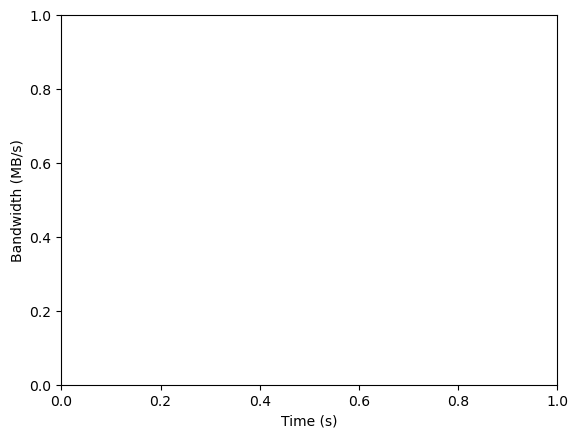

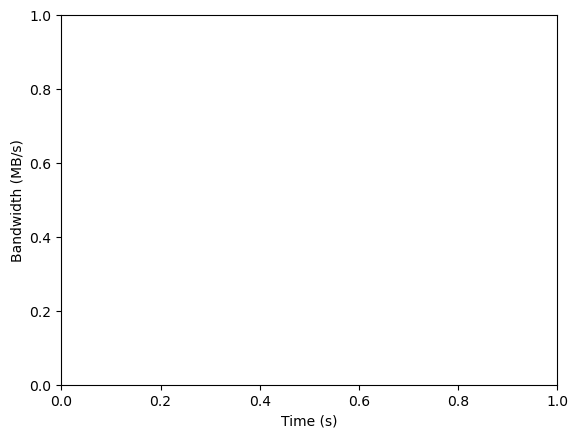

<Figure size 640x480 with 0 Axes>

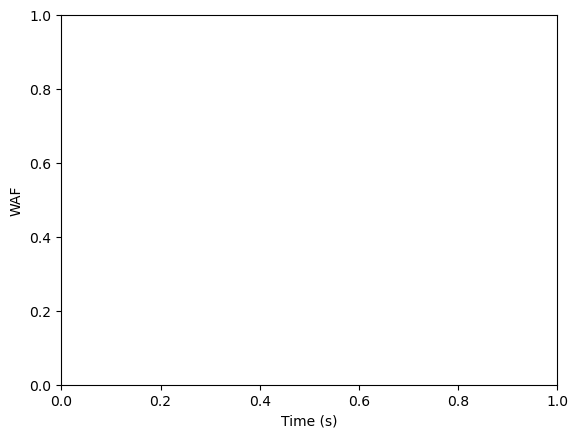

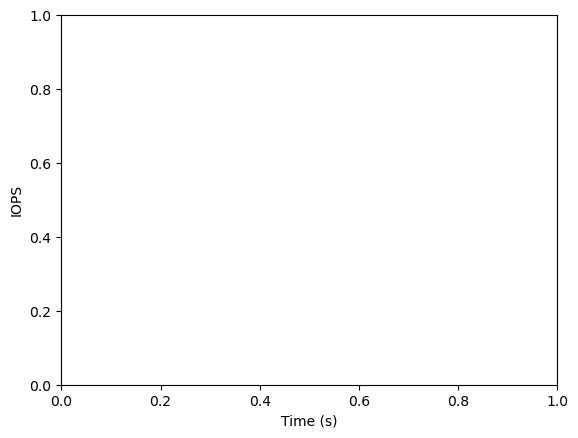

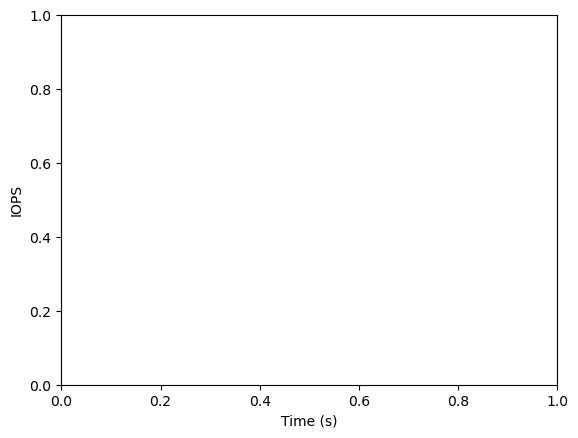

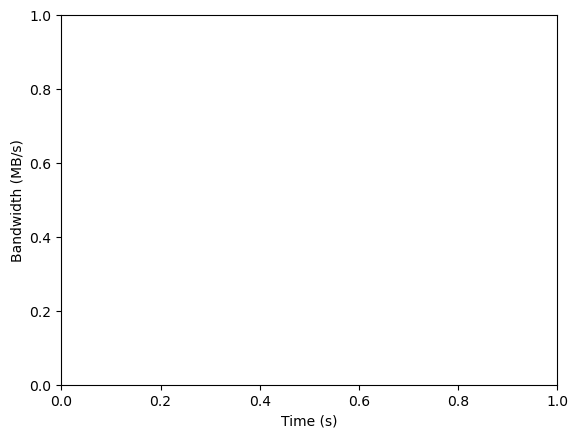

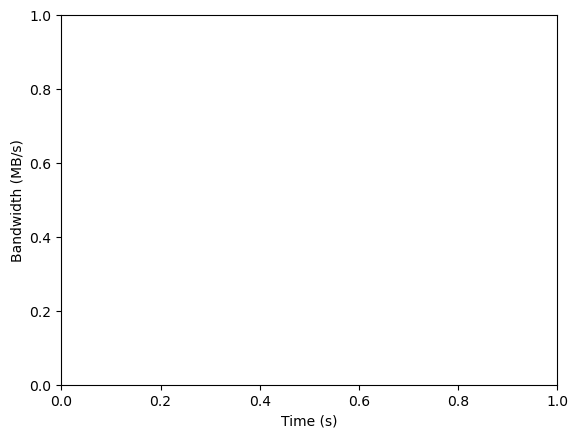

<Figure size 640x480 with 0 Axes>

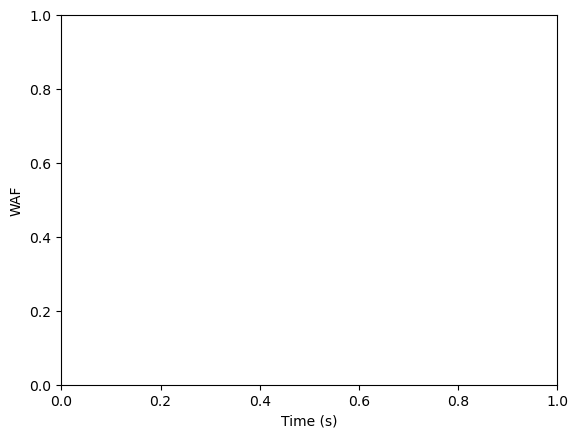

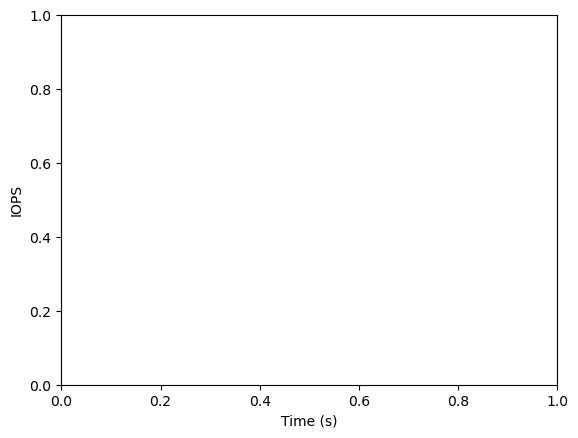

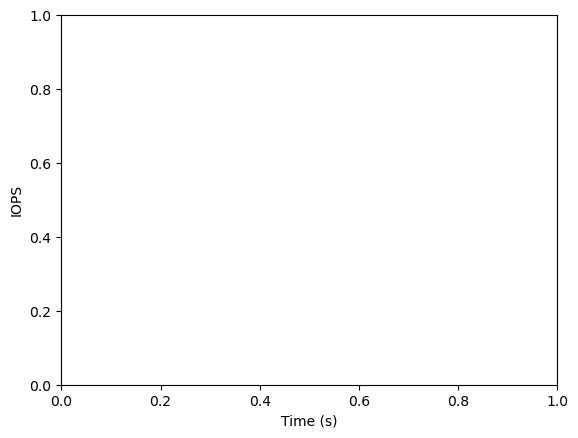

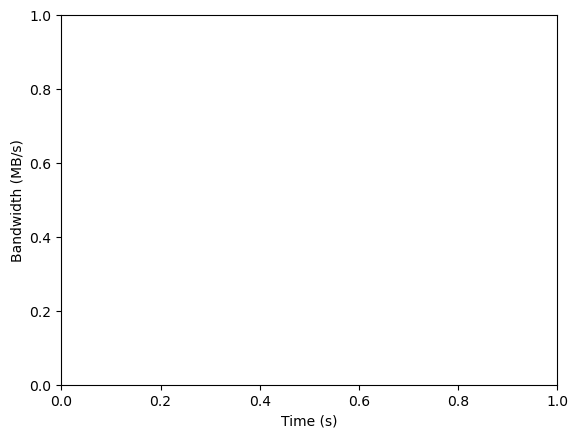

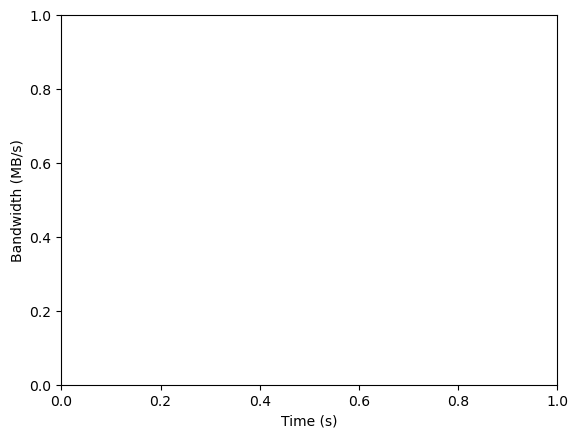

<Figure size 640x480 with 0 Axes>

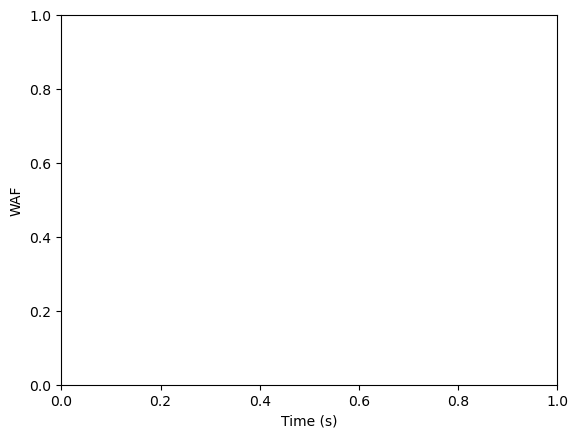

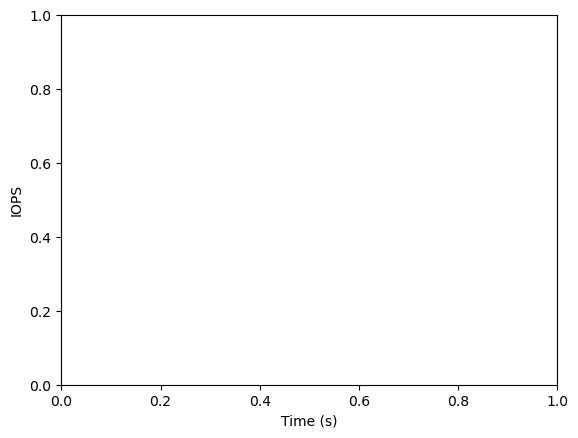

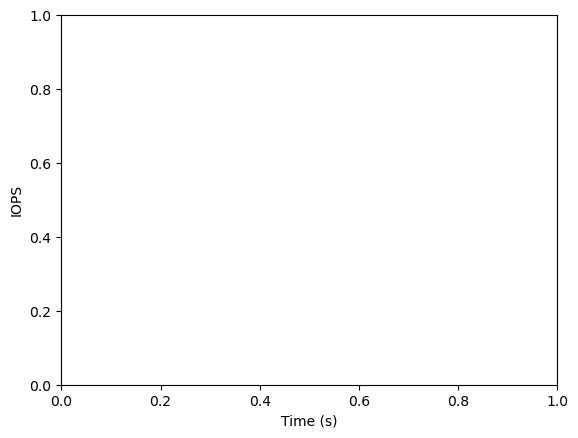

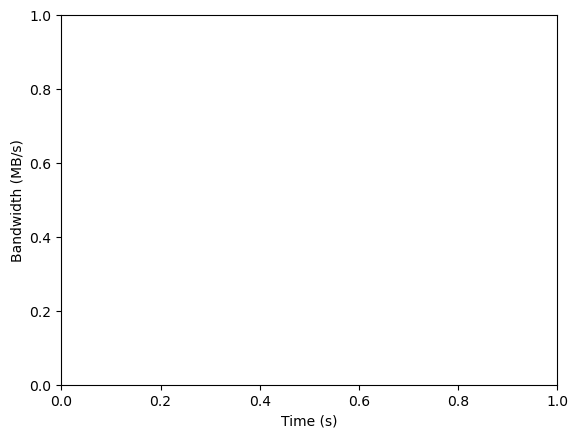

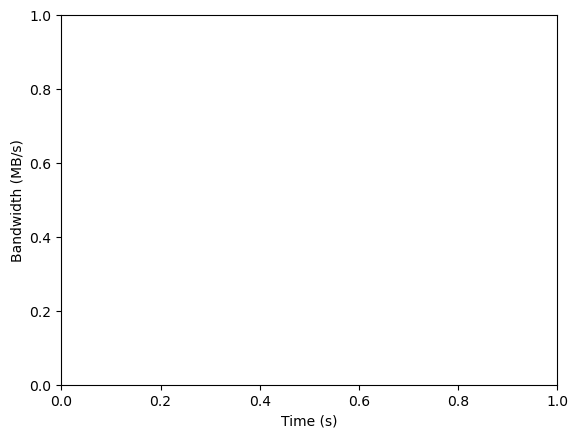

<Figure size 640x480 with 0 Axes>

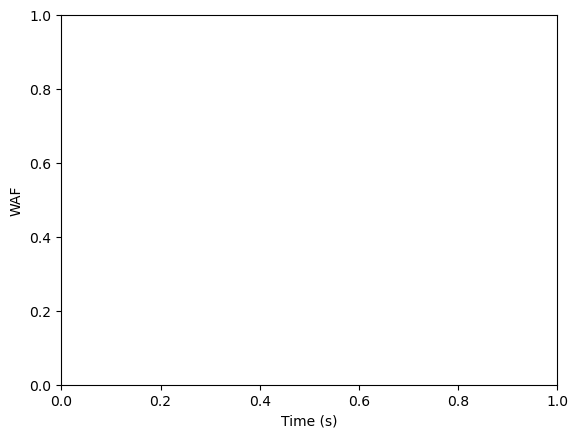

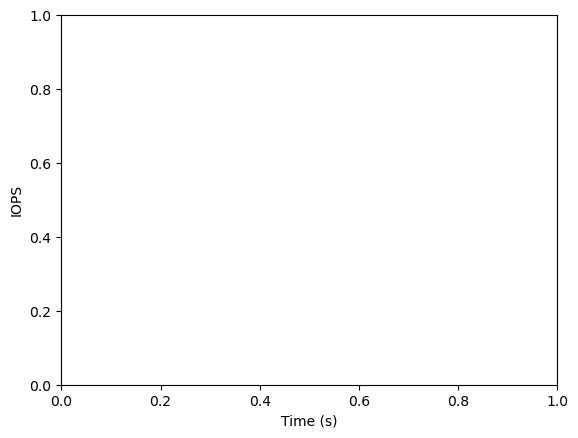

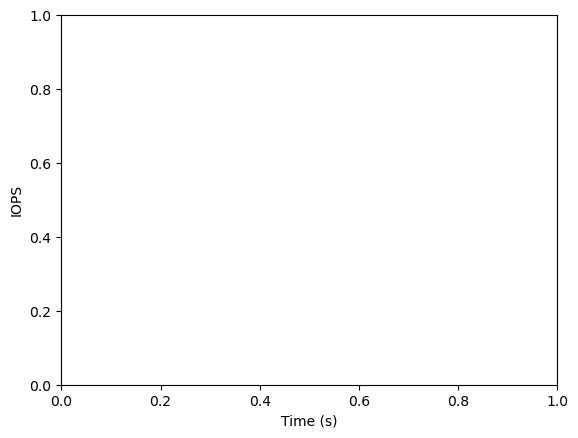

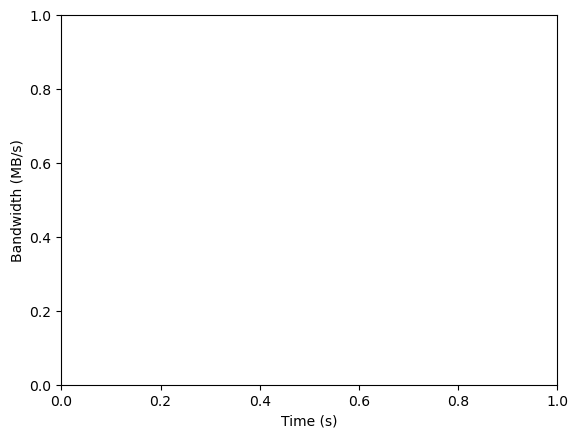

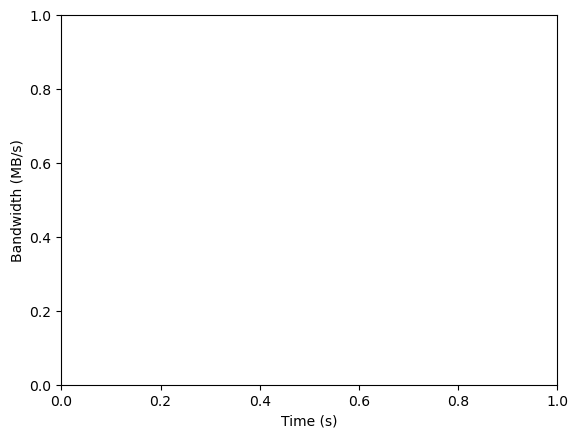

<Figure size 640x480 with 0 Axes>

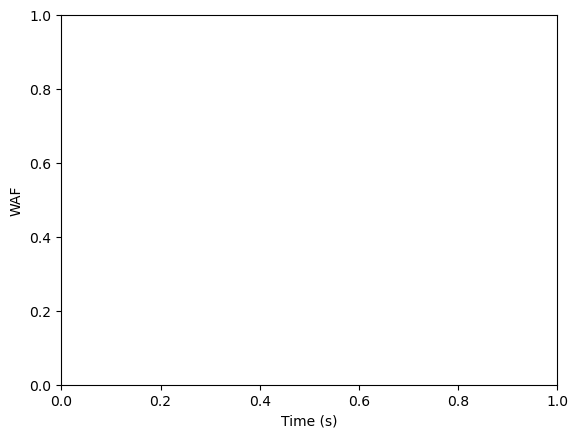

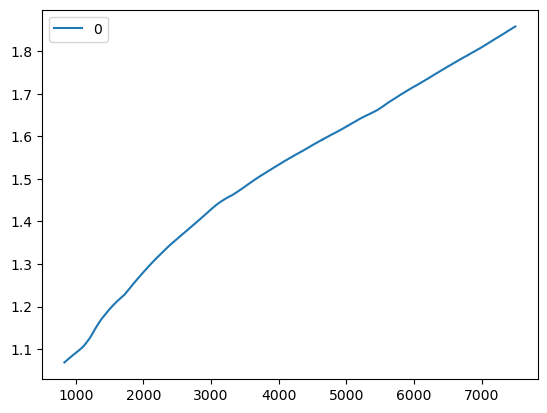

In [22]:
result_dics = []
for result_f in result_files:
    core_result_f = dump_core_log(result_f, section=2)
    algo, f = result_f.split(os.sep)[-2:]
    cc = algo.split("_")[-1]
    algo = "_".join(algo.split("_")[1:-1])
    plot_dir = f"/data/home/guntherxing/dev/spdk/exp/plot/{res_dir}"
    if not os.path.exists(plot_dir):
        os.mkdir(plot_dir)
    save_dir = os.path.join(plot_dir, f"trace_{algo}_{cc}")
    for metric in ["IOPS", "bw"]:
        plot_io(core_result_f, metric, save_dir)
    plot_stat_waf(core_result_f, save_dir)
    _, final_waf = plot_overall_waf(core_result_f, save_dir)
    iops, bw, latency = extract_fio(result_f, jobname="cbs-trace")
    # c_algo, dist = algo.split("_")[-2:]
    # algo = "_".join(algo.split("_")[:-2])
    result_dics.append({
        "algo": algo,
        "c_algo": cc,
        "dist": "",
        "bs": "",
        "wr": "",
        "op": 20,
        "IOPS": iops,
        "BW(MB/S)": bw,
        "latency": latency,
        "final_waf": final_waf,
    })
    os.remove(core_result_f)
result_df = pd.DataFrame(result_dics)
print(result_df)
result_df.to_csv(os.path.join("/data/home/guntherxing/dev/spdk/exp/result", f"{res_dir}.csv"), sep="\t")